In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
sys.path.append("../scripts")
from utils import Utils
from clean_data import DataCleaner

cleaner = DataCleaner()
utility = Utils()

In [2]:
cleaned_df=utility.load_data("../data/cleaned_data.csv")
# since our csv file doesn't have a meta data of columns dtype, we manually convert ['bearer_id', 'imsi', 'msisdn/number', 'imei','handset_type'] to string once again
cleaned_df=cleaner.convert_to_string(cleaned_df)

In [3]:
cleaned_df.rename(columns={"msisdn/number":"msisdn"},inplace=True)
cleaned_df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       

In [4]:
user_experience_df = cleaned_df[['msisdn', 'handset_type','avg_rtt_dl_(ms)','avg_rtt_ul_(ms)','avg_bearer_tp_dl_(kbps)','avg_bearer_tp_ul_(kbps)','tcp_dl_retrans._vol_(bytes)','tcp_ul_retrans._vol_(bytes)']]
user_experience_df.head()

,msisdn,handset_type,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes)
0,33664962239.0,Samsung Galaxy A5 Sm-A520F,42.0,5.0,23.0,44.0,568730.0,20949.5
1,33681854413.0,Samsung Galaxy J5 (Sm-J530),65.0,5.0,16.0,26.0,568730.0,20949.5
2,33760627129.0,Samsung Galaxy A8 (2018),45.0,5.0,6.0,9.0,568730.0,20949.5
3,33750343200.0,undefined,45.0,5.0,44.0,44.0,568730.0,20949.5
4,33699795932.0,Samsung Sm-G390F,45.0,5.0,6.0,9.0,568730.0,20949.5


In [5]:
total_rtt=user_experience_df['avg_rtt_dl_(ms)']+user_experience_df['avg_rtt_ul_(ms)']
total_tp=user_experience_df['avg_bearer_tp_dl_(kbps)']+user_experience_df['avg_bearer_tp_ul_(kbps)']
total_tcp=user_experience_df['tcp_dl_retrans._vol_(bytes)']+user_experience_df['tcp_ul_retrans._vol_(bytes)']
user_experience_total=pd.DataFrame({"msisdn":user_experience_df['msisdn'],"handset_type":user_experience_df['handset_type'],"total_rtt(ms)":total_rtt,"total_tp(kbps)":total_tp,"total_tcp(bytes)":total_tcp})
user_experience_total
user_experience_total.head()


,msisdn,handset_type,total_rtt(ms),total_tp(kbps),total_tcp(bytes)
0,33664962239.0,Samsung Galaxy A5 Sm-A520F,47.0,67.0,589679.5
1,33681854413.0,Samsung Galaxy J5 (Sm-J530),70.0,42.0,589679.5
2,33760627129.0,Samsung Galaxy A8 (2018),50.0,15.0,589679.5
3,33750343200.0,undefined,50.0,88.0,589679.5
4,33699795932.0,Samsung Sm-G390F,50.0,15.0,589679.5


### Aggregate, per customer, the following information 
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput


In [6]:
customer_group=user_experience_total.groupby(['msisdn'])

avg_tcp_retran=customer_group.agg({'total_tcp(bytes)':'mean'})
avg_tcp_retran.rename(columns={'total_tcp(bytes)':'avg_tcp(bytes)'},inplace=True)
avg_tcp_retran

,avg_tcp(bytes)
msisdn,
3197020876596.0,5.896795e+05
33601001722.0,5.896795e+05
33601001754.0,5.896795e+05
33601002511.0,5.896795e+05
33601007832.0,2.201550e+04
...,...
33789980299.0,2.998878e+05
33789996170.0,2.180450e+05
33789997247.0,5.896795e+05


In [7]:
avg_rtt=customer_group.agg({'total_rtt(ms)':'mean'})
avg_rtt.rename(columns={'total_rtt(ms)':'avg_rtt(ms)'},inplace=True)
avg_rtt

,avg_rtt(ms)
msisdn,
3197020876596.0,50.000000
33601001722.0,46.000000
33601001754.0,31.000000
33601002511.0,50.000000
33601007832.0,84.000000
...,...
33789980299.0,59.500000
33789996170.0,52.000000
33789997247.0,40.000000


In [8]:
freq_handset=customer_group.agg({'handset_type':pd.Series.mode})
freq_handset.rename(columns={'handset_type':'freq_handset_type'},inplace=True)
freq_handset

,freq_handset_type
msisdn,
3197020876596.0,Quectel Wireless. Quectel Ec25-E
33601001722.0,Huawei P20 Lite Huawei Nova 3E
33601001754.0,Apple iPhone 7 (A1778)
33601002511.0,undefined
33601007832.0,Apple iPhone 5S (A1457)
...,...
33789980299.0,undefined
33789996170.0,Huawei Honor 9 Lite
33789997247.0,Apple iPhone 8 Plus (A1897)


In [9]:
avg_tp=customer_group.agg({'total_tp(kbps)':'mean'})
avg_tp.rename(columns={'total_tp(kbps)':'avg_tp(kbps)'},inplace=True)
avg_tp

,avg_tp(kbps)
msisdn,
3197020876596.0,1.000000
33601001722.0,76.000000
33601001754.0,99.000000
33601002511.0,97.000000
33601007832.0,248.000000
...,...
33789980299.0,81539.500000
33789996170.0,10365.000000
33789997247.0,116.000000


In [10]:
# experience_by_customer=pd.DataFrame({
#     "avg_rtt_(ms)":avg_rtt,
#     "avg_tp(kbps)":avg_tp,
#     "avg_tcp_(bytes)":avg_tcp_retran
# },index=avg_rtt.index)
experience_by_customer=avg_rtt.copy()
experience_by_customer["avg_tp(kbps)"]=avg_tp
experience_by_customer["avg_tcp(bytes)"]=avg_tcp_retran
experience_by_customer

,avg_rtt(ms),avg_tp(kbps),avg_tcp(bytes)
msisdn,,,
3197020876596.0,50.000000,1.000000,5.896795e+05
33601001722.0,46.000000,76.000000,5.896795e+05
33601001754.0,31.000000,99.000000,5.896795e+05
33601002511.0,50.000000,97.000000,5.896795e+05
33601007832.0,84.000000,248.000000,2.201550e+04
...,...,...,...
33789980299.0,59.500000,81539.500000,2.998878e+05
33789996170.0,52.000000,10365.000000,2.180450e+05
33789997247.0,40.000000,116.000000,5.896795e+05


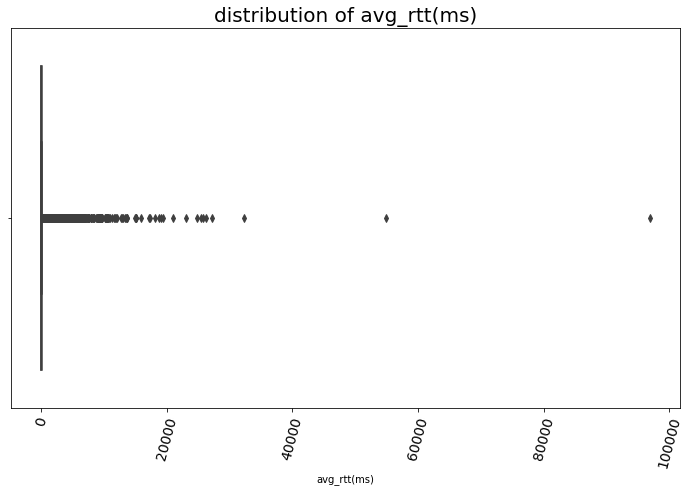

In [11]:
utility.plot_box(df=experience_by_customer,x_col="avg_rtt(ms)",title="distribution of avg_rtt(ms)")

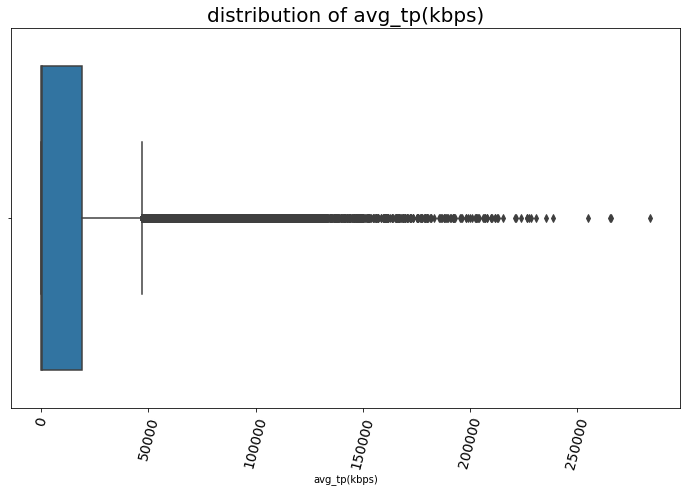

In [12]:

utility.plot_box(df=experience_by_customer,x_col="avg_tp(kbps)",title="distribution of avg_tp(kbps)")


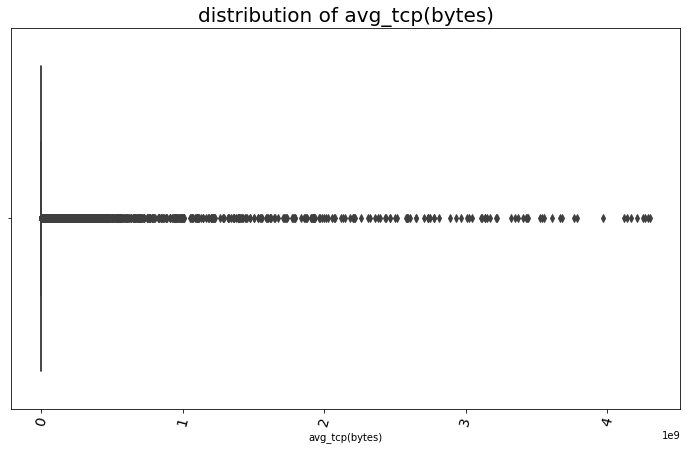

In [13]:
utility.plot_box(df=experience_by_customer,x_col="avg_tcp(bytes)",title="distribution of avg_tcp(bytes)")


In [14]:
experience_by_customer = cleaner.handle_outliers(experience_by_customer, 'avg_rtt(ms)', 'mean')
experience_by_customer = cleaner.handle_outliers(experience_by_customer, 'avg_tp(kbps)', 'mean')
experience_by_customer = cleaner.handle_outliers(experience_by_customer, 'avg_tcp(bytes)', 'mean')

experience_by_customer.head()

,avg_rtt(ms),avg_tp(kbps),avg_tcp(bytes)
msisdn,,,
3197020876596.0,50.0,1.0,589679.50
33601001722.0,46.0,76.0,589679.50
33601001754.0,31.0,99.0,589679.50
33601002511.0,50.0,97.0,589679.50
33601007832.0,84.0,248.0,556100.75


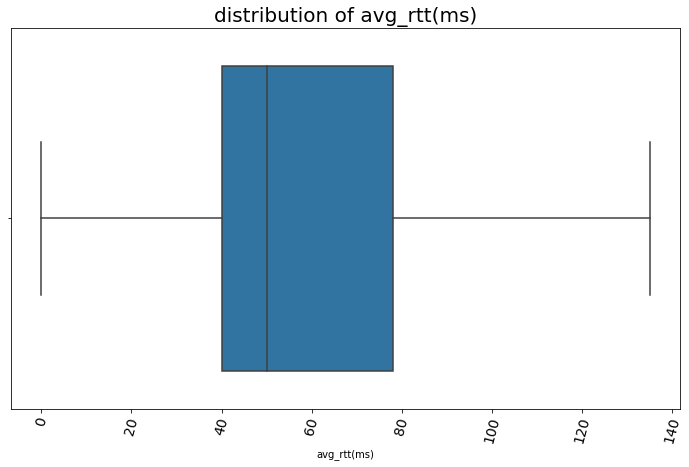

In [15]:
utility.plot_box(df=experience_by_customer,x_col="avg_rtt(ms)",title="distribution of avg_rtt(ms)")


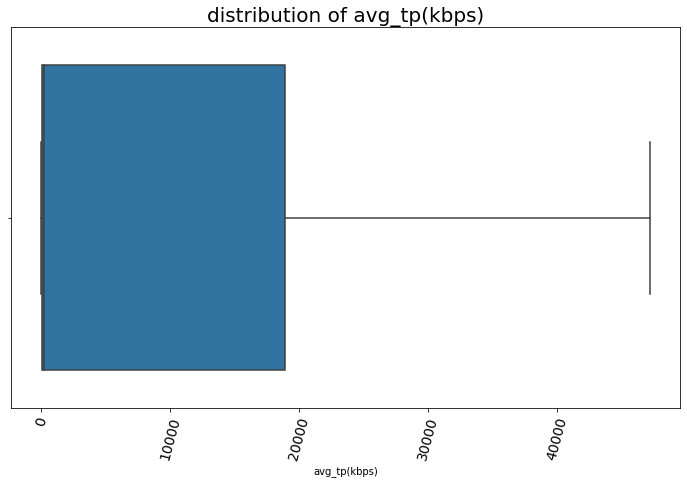

In [16]:
utility.plot_box(df=experience_by_customer,x_col="avg_tp(kbps)",title="distribution of avg_tp(kbps)")


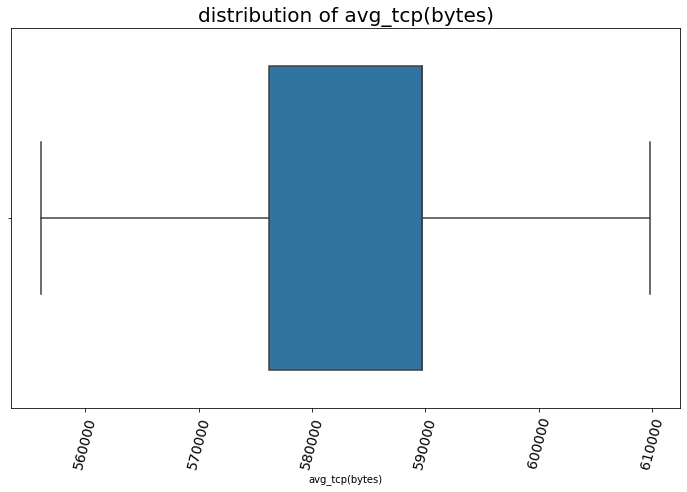

In [17]:
utility.plot_box(df=experience_by_customer,x_col="avg_tcp(bytes)",title="distribution of avg_tcp(bytes)")


### Top 10 TCP, RTT, TP values

In [18]:
print("Top 10 TCP")
display(avg_tcp_retran.sort_values(by=["avg_tcp(bytes)"],ascending=False).head(10))

print("Top 10 RTT")
display(avg_rtt.sort_values(by=["avg_rtt(ms)"],ascending=False).head(10))

print("Top 10 TP")
display(avg_tp.sort_values(by=["avg_tp(kbps)"],ascending=False).head(10))

Top 10 TCP


,avg_tcp(bytes)
msisdn,
33698575965.0,4.301477e+09
33658706088.0,4.288121e+09
33664907178.0,4.268647e+09
33658633234.0,4.254660e+09
33666125485.0,4.211258e+09
33668768421.0,4.166595e+09
33661305358.0,4.137938e+09
33662396708.0,4.117805e+09
33666824231.0,3.968121e+09


Top 10 RTT


,avg_rtt(ms)
msisdn,
33662317023.0,96924.0
33683692867.0,54848.0
33660874265.0,32335.0
33760941100.0,27278.0
33606788933.0,26300.0
33671816754.0,25715.0
33781865588.0,25388.0
33784013667.0,24738.0
33698551167.0,23010.5


Top 10 TP


,avg_tp(kbps)
msisdn,
33659907570.0,283931.0
33662681056.0,265724.0
33665658364.0,265176.5
33663487108.0,254950.0
33627953865.0,238982.0
33621176428.0,235365.0
33782399167.0,230982.0
33651479599.0,228303.0
33760327549.0,227334.0


### Bottom 10 TCP, RTT, TP values

In [19]:
print("Bottom 10 TCP")
display(avg_tcp_retran.sort_values(by=["avg_tcp(bytes)"],ascending=False).tail(10))

print("Bottom 10 RTT")
display(avg_rtt.sort_values(by=["avg_rtt(ms)"],ascending=False).tail(10))

print("Bottom 10 TP")
display(avg_tp.sort_values(by=["avg_tp(kbps)"],ascending=False).tail(10))

Bottom 10 TCP


,avg_tcp(bytes)
msisdn,
33699694715.0,182.0
33679366089.0,179.0
33784203839.0,177.0
33769636458.0,176.0
33650681239.0,176.0
33607833304.0,143.0
33626357513.0,134.0
33762062356.0,129.0
33614777138.0,128.0


Bottom 10 RTT


,avg_rtt(ms)
msisdn,
33634684770.0,10.0
33672196893.0,9.0
33610846366.0,9.0
33647679481.0,8.0
33668619895.0,6.0
33659493541.0,5.0
33695045499.0,4.0
33660204450.0,2.0
33661575382.0,0.0


Bottom 10 TP


,avg_tp(kbps)
msisdn,
33666206832.0,0.0
33660916790.0,0.0
33698591046.0,0.0
33659471143.0,0.0
33621664002.0,0.0
33777464744.0,0.0
33619834498.0,0.0
33650000334.0,0.0
33660339983.0,0.0


### Top 10 frequent TCP, RTT, TP values

In [20]:
print("10 top frequent TCP")
display(avg_tcp_retran.value_counts().sort_values(ascending=False).head(10))

print("10 top frequent RTT")
display(avg_rtt.value_counts().sort_values(ascending=False).head(10))

print("10 top frequent TP")
display(avg_tp.value_counts().sort_values(ascending=False).head(10))

10 top frequent TCP


avg_tcp(bytes)
589679.50         55974
570024.00           367
570060.00           167
22279.50            145
579851.75            82
570048.00            81
21041.50             78
23609.50             78
20987.50             70
571390.00            65
dtype: int64

10 top frequent RTT


avg_rtt(ms)
50.0           19546
29.0            2950
39.0            2409
38.0            1657
40.0            1642
30.0            1577
28.0            1457
49.0            1391
41.0            1260
31.0            1190
dtype: int64

10 top frequent TP


avg_tp(kbps)
15.0            2872
63.0            2138
97.0            1094
90.0            1062
98.0            1025
96.0             938
99.0             918
89.0             881
91.0             864
95.0             856
dtype: int64

### Distribution of the average throughput per handset type and provide interpretation
### Distribution of the average tcp transmission view per handset type

In [21]:
user_experience_total.columns

Index(['msisdn', 'handset_type', 'total_rtt(ms)', 'total_tp(kbps)',
       'total_tcp(bytes)'],
      dtype='object')

In [22]:
user_experience_total
per_handset = user_experience_total.groupby('handset_type').agg({'total_tp(kbps)': 'sum', 'total_tcp(bytes)': 'sum'})
per_handset.head()

,total_tp(kbps),total_tcp(bytes)
handset_type,,
A-Link Telecom I. Cubot A5,23510.0,589679.5
A-Link Telecom I. Cubot Note Plus,6699.0,616213.0
A-Link Telecom I. Cubot Note S,8937.0,41411731.0
A-Link Telecom I. Cubot Nova,56217.0,137170.0
A-Link Telecom I. Cubot Power,69468.0,8041.0


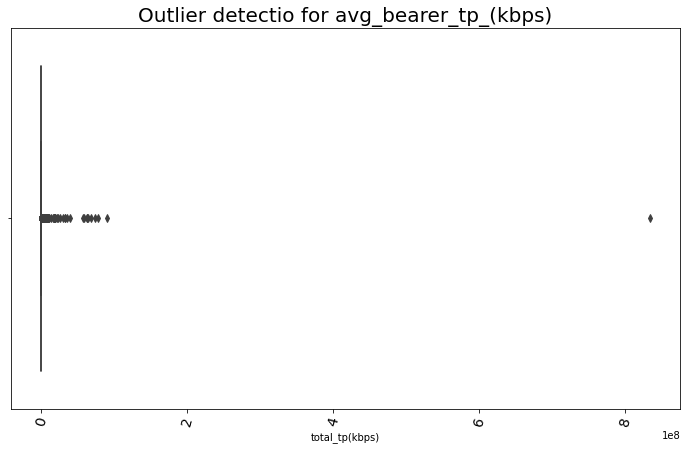

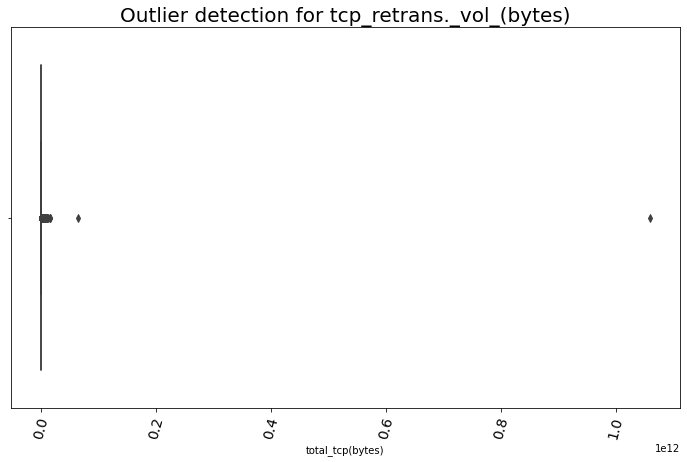

In [23]:

utility.plot_box(per_handset, 'total_tp(kbps)', 'Outlier detectio for avg_bearer_tp_(kbps)')
utility.plot_box(per_handset, 'total_tcp(bytes)', 'Outlier detection for tcp_retrans._vol_(bytes)')

In [24]:
cleaned_per_handset = cleaner.handle_outliers(per_handset, 'total_tp(kbps)')
cleaned_per_handset = cleaner.handle_outliers(cleaned_per_handset, 'total_tcp(bytes)')

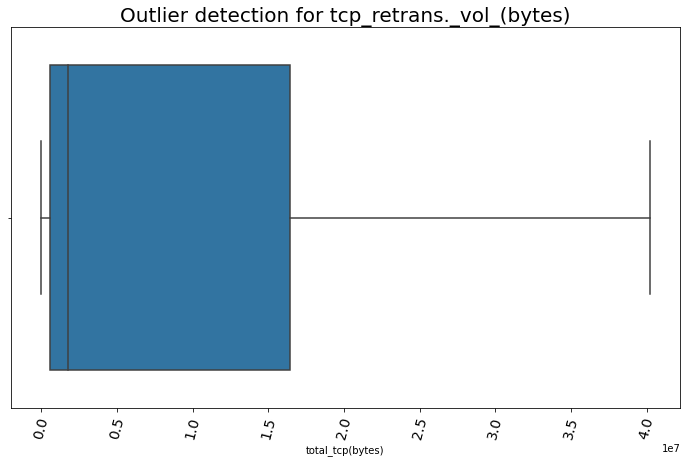

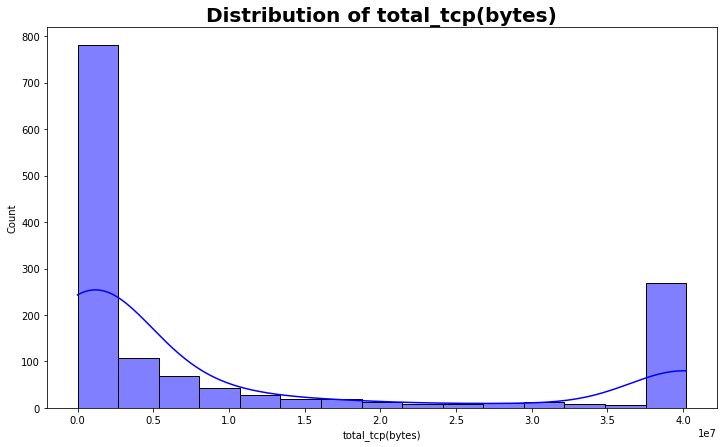

In [25]:
utility.plot_box(cleaned_per_handset, 'total_tcp(bytes)', 'Outlier detection for tcp_retrans._vol_(bytes)')
utility.plot_hist(cleaned_per_handset, 'total_tcp(bytes)', 'blue')


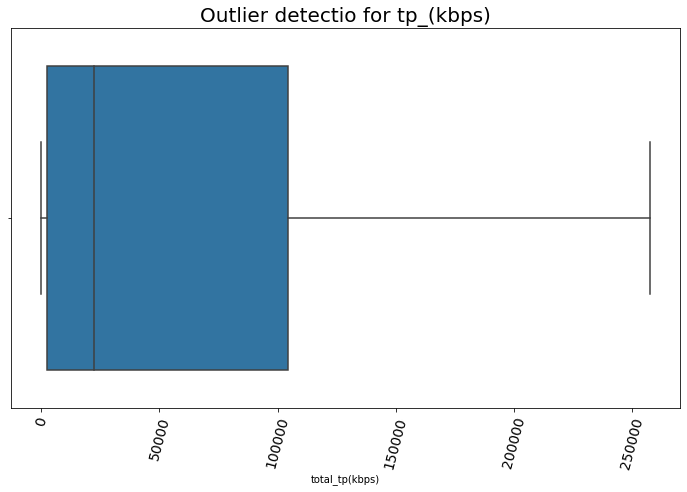

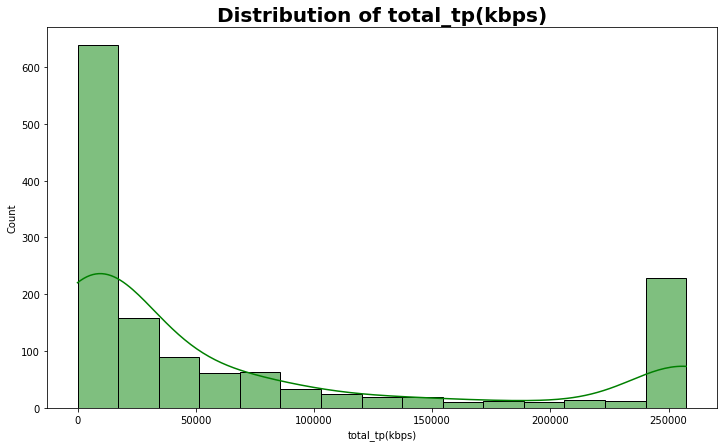

In [26]:
utility.plot_box(cleaned_per_handset, 'total_tp(kbps)', 'Outlier detectio for tp_(kbps)')
utility.plot_hist(cleaned_per_handset, 'total_tp(kbps)','green')